# Advanced usage: Music Feature Extraction

In the following, you will learn how to use `musiCNN` as a music feature extractor.
You can extract features at every layer of our model. For this reason, we will be didactially presenting our model so that you can understand what to expect out of each layer.
To start, let's consider this music clip:

In [1]:
file_name = './audio/joram-moments_of_clarity-08-solipsism-59-88.mp3'

Run these two code lines to extract music features with our `MTT model`:

In [2]:
from musiCNN.extractor import extractor
taggram, tags, features = extractor(file_name, model='MTT', extract_features=True)

Computing spectrogram (w/ librosa) and tags (w/ tensorflow)..


100%|██████████| 8/8 [00:00<00:00, 21.37it/s]


Out of the extractor, we get the **output** of the model (the Taggram and its associated tags) and all the **intermediate representations** of it (we refer to those as features):

In [3]:
list(features.keys())

['timbral',
 'temporal',
 'cnn1',
 'cnn2',
 'cnn3',
 'avg_pool',
 'max_pool',
 'penultimate']

These different features, correspond to the output of the different layers of our MTT model:

FER UN DIAGRAMA DEL MODEL

This pre-trained model and features can be used for **transfer learning**, and in the following we will take a look on how they look like.

### How do front-end features look like?

Note in previous figure that the output of our front-end is the concatenation of the `timbral` and `temporal` features:

In [4]:
import numpy as np
front_end_features = np.concatenate([features['temporal'], features['timbral']], axis=1)

Given the design of the front-end, we expect the `timbral` features to capture pitch-invariant timbral traces in spectrograms, while the `temporal` features are designed to capture longer temporal cues that are expressed along a frequncy band.

Let's depict how these features look like!

In [5]:
%matplotlib inline
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec

def depict_features(features, coordinates, title, aspect='equal', xlabel=True):
    # plot features in coordinates
    ax = plt.subplot(coordinates) 
    plt.imshow(np.flipud(features.T), interpolation=None, aspect=aspect)
    # set title
    ax.title.set_text(title + ' (' + str(features.shape[1]) + ')' )
    ax.title.set_fontsize(8)
    # y-axis
    ax.get_yaxis().set_visible(False)
    # x-axis
    x_label = np.arange(0, features.shape[0], features.shape[0]//5)
    ax.set_xticks(x_label)
    ax.set_xticklabels(x_label, fontsize=6)
    if xlabel:
        ax.set_xlabel('Time (frames)', fontsize=6)

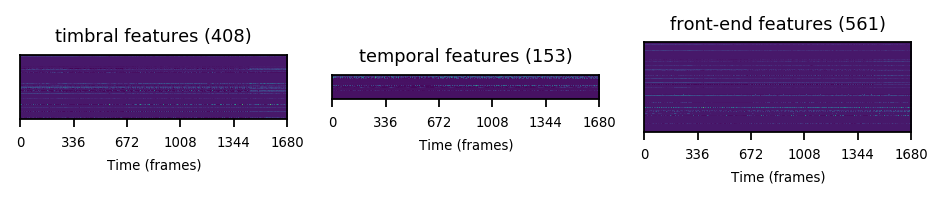

In [20]:
plt.rcParams['figure.dpi'] = 160 # make it big: to properlly visualize the figure
gs = gridspec.GridSpec(1, 3) # create a figure having 1 rows and 3 cols.

depict_features(features=features['timbral'],
                coordinates=gs[0, 0],
                title='timbral features')

depict_features(features=features['temporal'],
                coordinates=gs[0, 1],
                title='temporal features')

depict_features(features=front_end_features,
                coordinates=gs[0, 2],
                title='front-end features')

plt.tight_layout()
plt.show()

The previous figures depict the temporal evolution of the computed features (y-axis: features, x-axis: time).
Hence, the `timbral` features (with 408 features) and the `temporal` features (with 153 features) are concatenated to compose the front-end features (with 561 feature maps). These front-end features are now fed to mid-end CNN layers.

### How do mid-end CNN features look like?

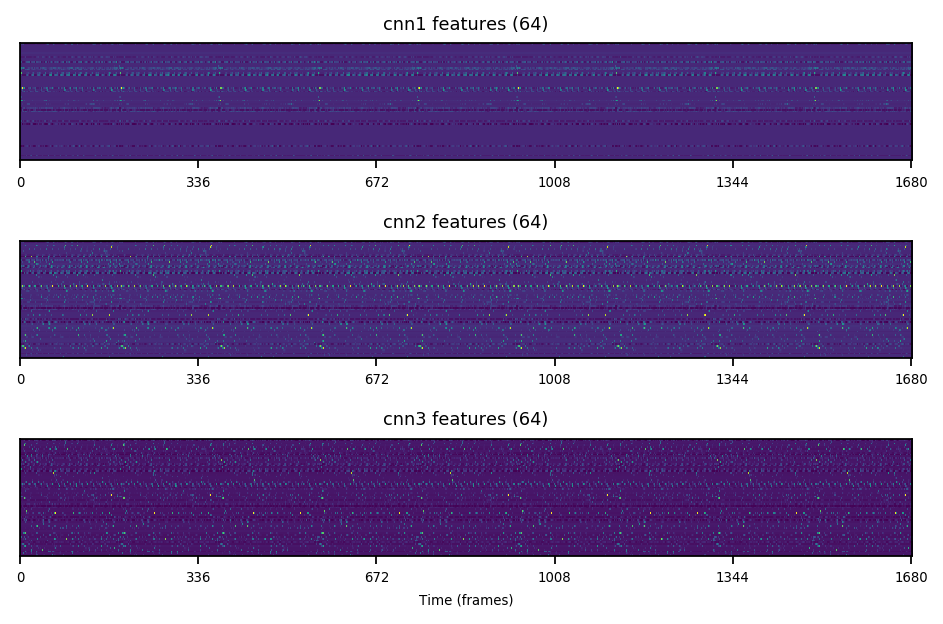

In [7]:
plt.rcParams['figure.dpi'] = 160 # make it big: to properlly visualize the figure
gs = gridspec.GridSpec(3, 1) # create a figure having 1 rows and 3 cols.

depict_features(features=features['cnn1'],
                coordinates=gs[0, 0],
                title='cnn1 features',
                aspect='auto',
                xlabel=False)

depict_features(features=features['cnn2'],
                coordinates=gs[1, 0],
                title='cnn2 features',
                aspect='auto',
                xlabel=False)

depict_features(features=features['cnn3'],
                coordinates=gs[2, 0],
                title='cnn3 features',
                aspect='auto')

plt.tight_layout()
plt.show()

### How do output features look like?

Remember that all the above are computed with patches of 3 seconds. 

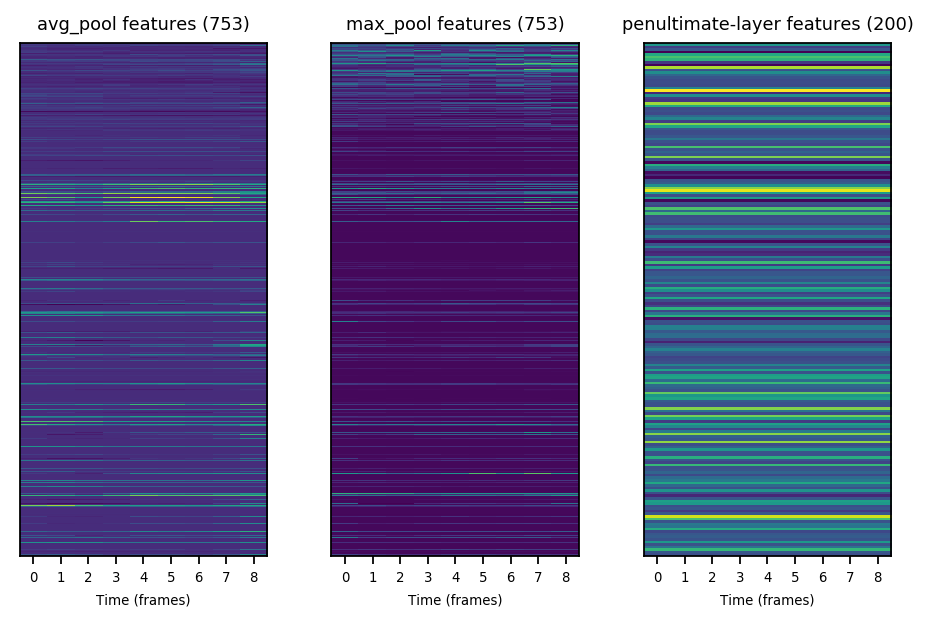

In [22]:
plt.rcParams['figure.dpi'] = 160 # make it big: to properlly visualize the figure
gs = gridspec.GridSpec(1, 3) # create a figure having 1 rows and 3 cols.

depict_features(features=features['avg_pool'],
                coordinates=gs[0, 0],
                title='avg_pool features',
                aspect='auto')

depict_features(features=features['max_pool'],
                coordinates=gs[0, 1],
                title='max_pool features',
                aspect='auto')

depict_features(features=features['penultimate'],
                coordinates=gs[0, 2],
                title='penultimate-layer features',
                aspect='auto')

plt.tight_layout()
plt.show()

And finally, let's visualize the Taggram output:

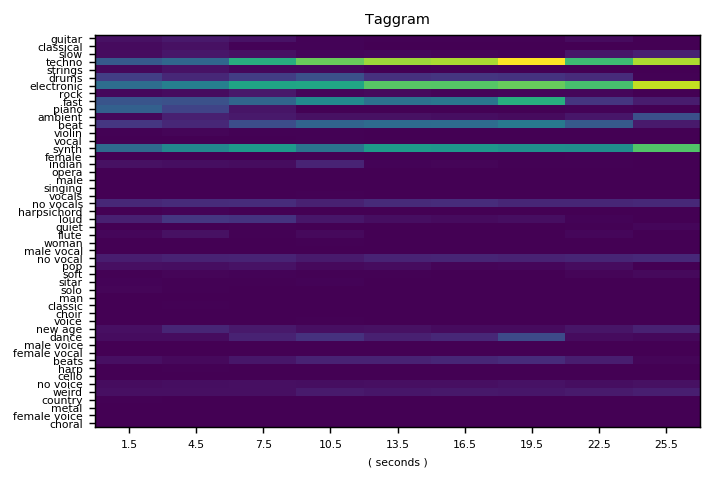

In [19]:
plt.rcParams['figure.dpi'] = 130 # make it big: to properlly visualize the figure
in_length = 3 # seconds -- by default, the model takes inputs of 3 seconds with no overlap

# depict taggram
fig, ax = plt.subplots()
ax.imshow(taggram.T, interpolation=None, aspect="auto")

# title
ax.title.set_text('Taggram')
ax.title.set_fontsize(8)

# x-axis title
ax.set_xlabel('( seconds )', fontsize=6)

# y-axis
y_pos = np.arange(len(tags))
ax.set_yticks(y_pos)
ax.set_yticklabels(tags, fontsize=6)

# x-axis
x_pos = np.arange(taggram.shape[0])
x_label = np.arange(in_length/2, in_length*taggram.shape[0], 3)
ax.set_xticks(x_pos)
ax.set_xticklabels(x_label, fontsize=6)

plt.show()